## Plot Results

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dataset ='prison'

In [3]:
errors = pd.read_csv(f'../results/expanding_window_results/errors/summary/{dataset}.csv', index_col=0)

base_errors = pd.read_csv(f'../results/expanding_window_results/errors/summary/{dataset}_base_errors.csv', index_col=0)

In [78]:
errors = errors.loc[errors['reconciliation method']!='erm']

In [79]:
global_models_deepAR = base_errors.loc[base_errors['base model'].isin(['deepAR', 'deepAR_cluster'])]
global_models_wavenet = base_errors.loc[base_errors['base model'].isin(['waveNet', 'waveNet_cluster'])]

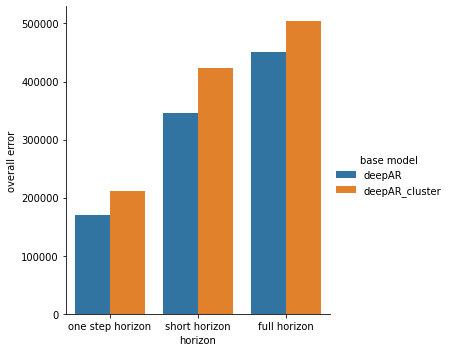

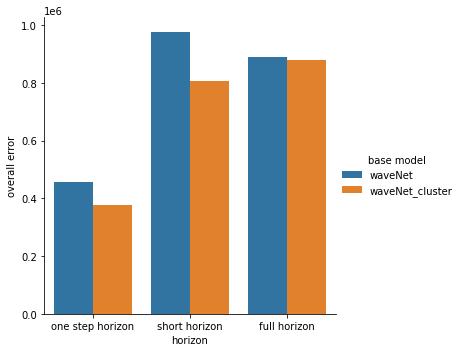

In [80]:
global_err_deepAR = sns.catplot(x="horizon",
                      y = 'overall error', data= global_models_deepAR, kind='bar',
                      hue ='base model',
                      order = ['one step horizon', 'short horizon', 'full horizon'])

global_err_wavenet = sns.catplot(x="horizon",
                      y = 'overall error', data= global_models_wavenet, kind='bar',
                      hue ='base model',
                      order = ['one step horizon', 'short horizon', 'full horizon'])

global_err_deepAR.figure.savefig(f'../results/expanding_window_results/{dataset}_deepAR.jpg')
global_err_wavenet.figure.savefig(f'../results/expanding_window_results/{dataset}_waveNet.jpg')

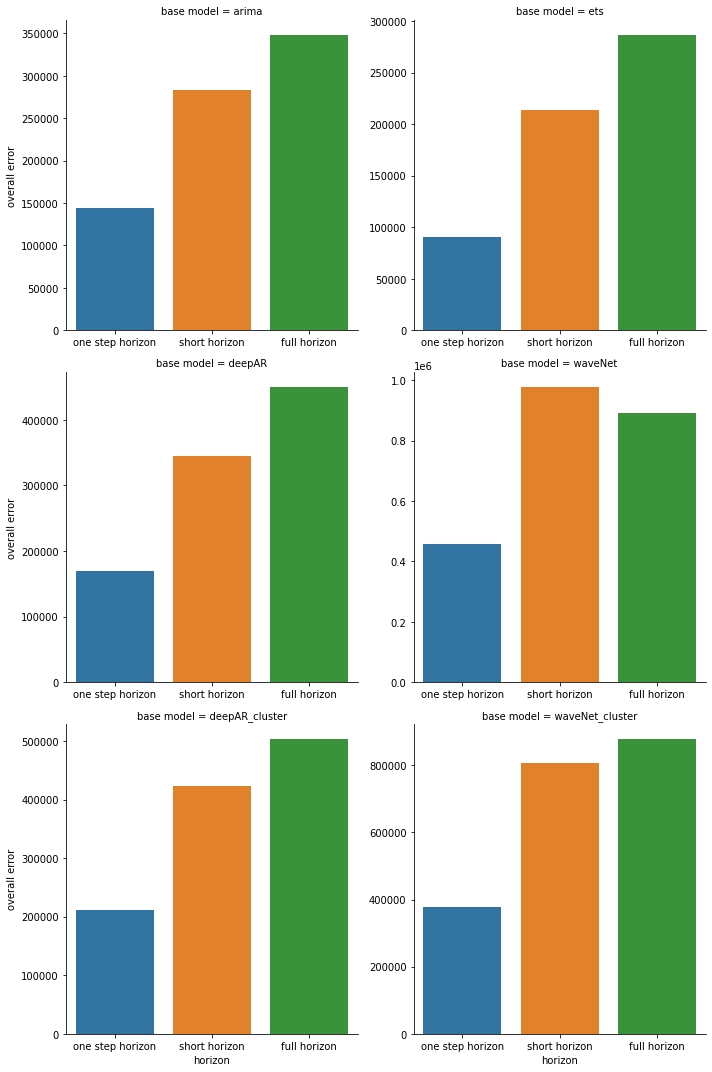

In [81]:
base_err = sns.catplot(x="horizon",
                      y = 'overall error', data= base_errors, kind='bar',
                      col_wrap=2,sharex = False, sharey= False,col='base model',
                      order = ['one step horizon', 'short horizon', 'full horizon'])

base_err.figure.savefig(f'../results/expanding_window_results/{dataset}_base_errors.jpg')

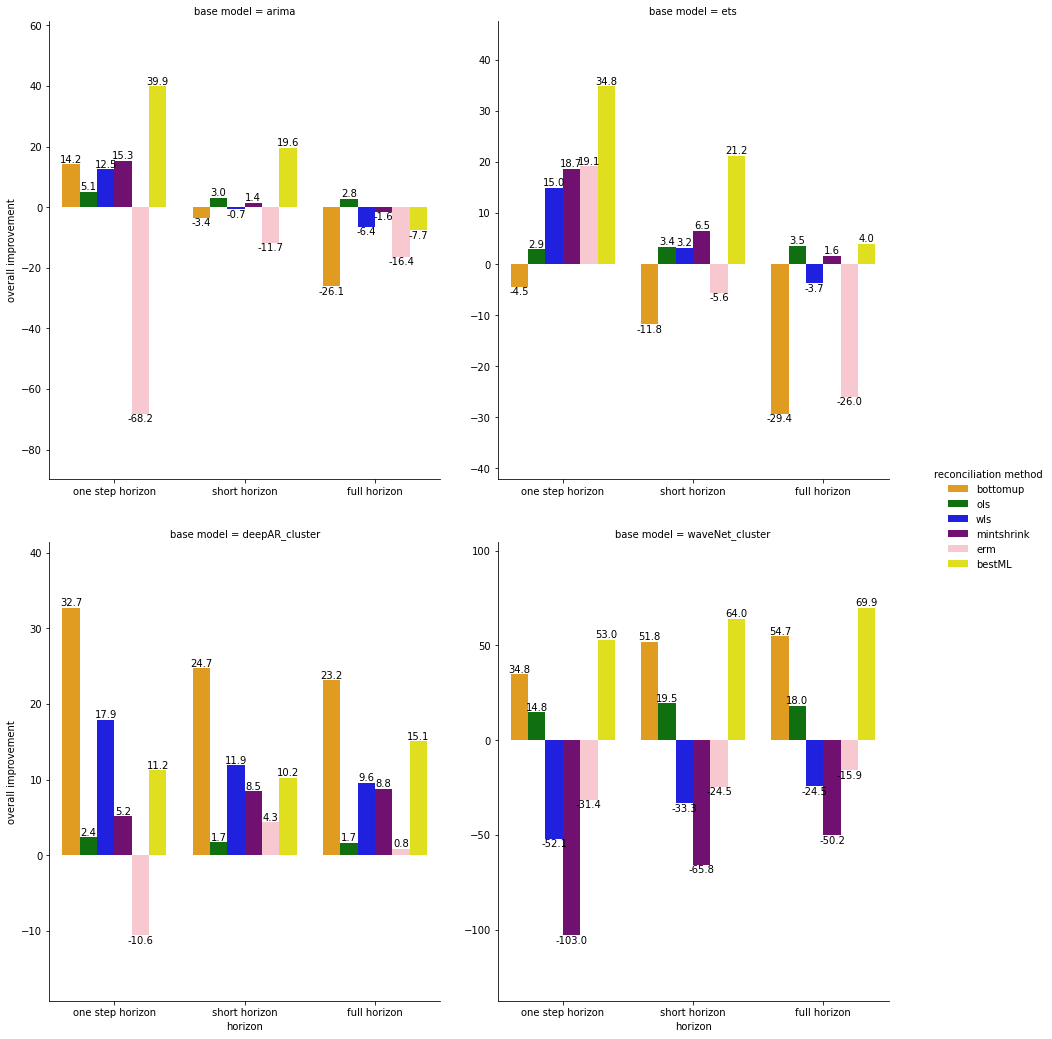

In [13]:
plot_err = sns.catplot(x="horizon", col="base model",
                y = 'overall improvement', hue ='reconciliation method', data= errors, kind='bar',  col_wrap=2,
                      sharex = False, sharey= False, order = ['one step horizon', 'short horizon', 'full horizon'], 
                      palette = ['orange', 'green', 'blue', 'purple', 'pink','yellow'])
plot_err.fig.set_size_inches(15, 15)
# iterate through axes
for ax in plot_err.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
# plot_err.figure.savefig(f'../results/expanding_window_results/{dataset}_errors.jpg')

# Plots for Slides

In [49]:
import plotly.graph_objects as go

In [15]:
# errors_plot

In [85]:
dataset ='labour'
errors = pd.read_csv(f'../results/expanding_window_results/errors/summary/{dataset}.csv', index_col=0)


In [94]:
# let's only take cluster results

horizon = 'one step horizon'
methods_consider = ['arima', 'ets', 'deepAR_cluster', 'waveNet_cluster']
errors_plot = errors.loc[errors['base model'].isin(methods_consider)]

errors_plot = errors_plot.loc[errors_plot['horizon'] == horizon] 


In [95]:
# errors_plot
import plotly.express as px

color_p = px.colors.qualitative.D3

In [96]:
base_models = ['ARIMA', 'ETS', 'DeepAR', 'WaveNet']
reconciliation_methods = ['bottomup', 'ols', 'wls', 'erm', 'mintshrink', 'mintsample', 'bestML']
names_plot = {'bottomup': 'Bottom Up', 'ols': 'OLS', 'wls': 'WLS', 'erm': 'ERM', 'mintshrink': 'MinTShrink',
              'bestML': 'ML', 'mintsample': 'MinTSample'}

fig = go.Figure()

for rec_method in reconciliation_methods:
    vals = []
    for m in methods_consider:
        bar_plt = errors_plot.loc[errors_plot['base model'] == m]
        error_val = bar_plt.loc[bar_plt['reconciliation method'] == rec_method]['overall improvement'].values[0]
        vals.append(error_val)
    if rec_method == 'bestML':
        fig.add_trace(go.Bar(name = names_plot[rec_method], x = base_models, y= vals, marker_color=color_p[5]))
    elif rec_method == 'mintsample':
        fig.add_trace(go.Bar(name = names_plot[rec_method], x = base_models, y= vals, marker_color=color_p[6]))
    else:
        fig.add_trace(go.Bar(name = names_plot[rec_method], x = base_models, y= vals))
fig.update_layout(barmode='group', template='none', yaxis= dict(title= 'MSE Overall <br> Error Reduction (%)')
                 ,xaxis = dict(title = 'Base Model'), 
                  legend =dict(title='Reconciliation Method'
                  , font_size=14), yaxis_range =[-50, 40])
fig.show()